# **Neural Network Type Classification - TMNIST**

### **AIM :**
This notebook aims to perform classification on the TMNIST dataset using Convolutional Neural Network (CNN), CNN with Hyperparameter tuning and Dense Neural Network (DNN).

### **DATASET :**
The dataset includes 94 distinct elements, encompassing alphabets and special characters. The objective is to build models that can accurately categorize these diverse symbols.

### **PROCESS FLOW :**

1.  Importing necessary libraribes
2.  Loading and analyzing dataset
3.  Data Preprocessing
4.  Training the model
5.  Evaluating the model
6.  Vizualing accuracy







Copyright [2023] [Smithi Parthiban]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## 1. IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

## 2.1 LOADING THE DATASET

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
#df.head()

In [ ]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.2 ANALYZING THE DATASET

In [ ]:
all = list(df['labels'].unique())
df['labels'].unique()

capitalS_regex = re.compile(r"[A-Z]")
small_regex = re.compile(r"[a-z]")
numbers_regex = re.compile(r"[0-9]")
special_characters_regex = re.compile(r"[\W]|[\_\,]")

capitalS = capitalS_regex.findall(str(all))
small = small_regex.findall(str(all))
numbers = numbers_regex.findall(str(all))
special_characters = special_characters_regex.findall(str(all))

# Removing the empty space character
special_characters.pop(27)

"'"

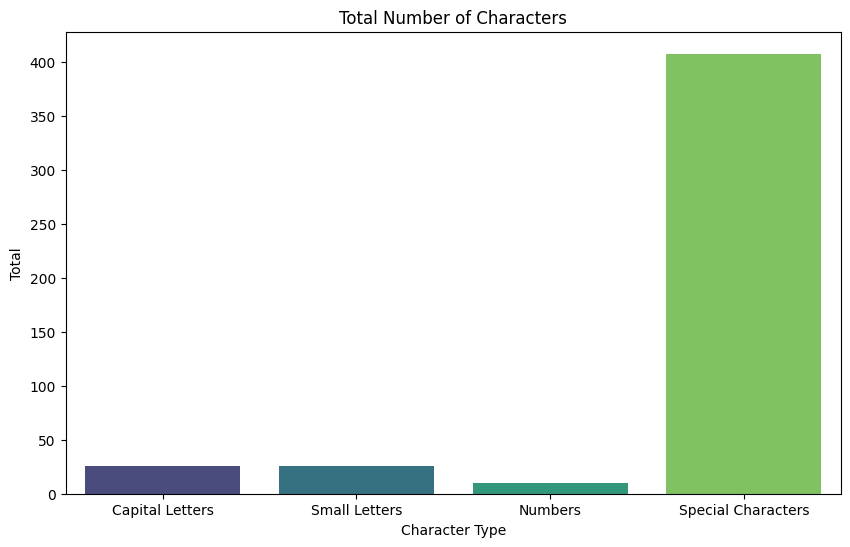

In [ ]:
characters = ["Capital Letters", "Small Letters", "Numbers", "Special Characters"]
counts = [len(capitalS), len(small), len(numbers), len(special_characters)]

plt.figure(figsize=(10, 6))
sns.barplot(x=characters, y=counts, palette="viridis")

plt.xlabel('Character Type')
plt.ylabel('Total')
plt.title('Total Number of Characters')
plt.show()


### TRAIN TEST SPLIT

In [ ]:
y=df['labels']
X=df.drop(['names','labels'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

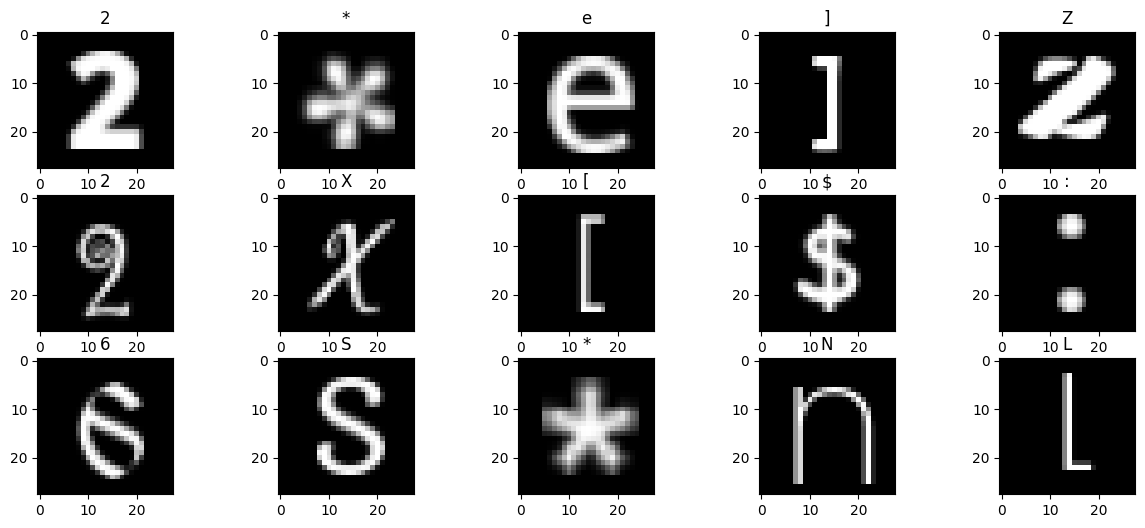

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.title(Y_train.iloc[i])
  # Converting 1d to 2d array using reshape
  plt.imshow(X_train.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))

plt.show()

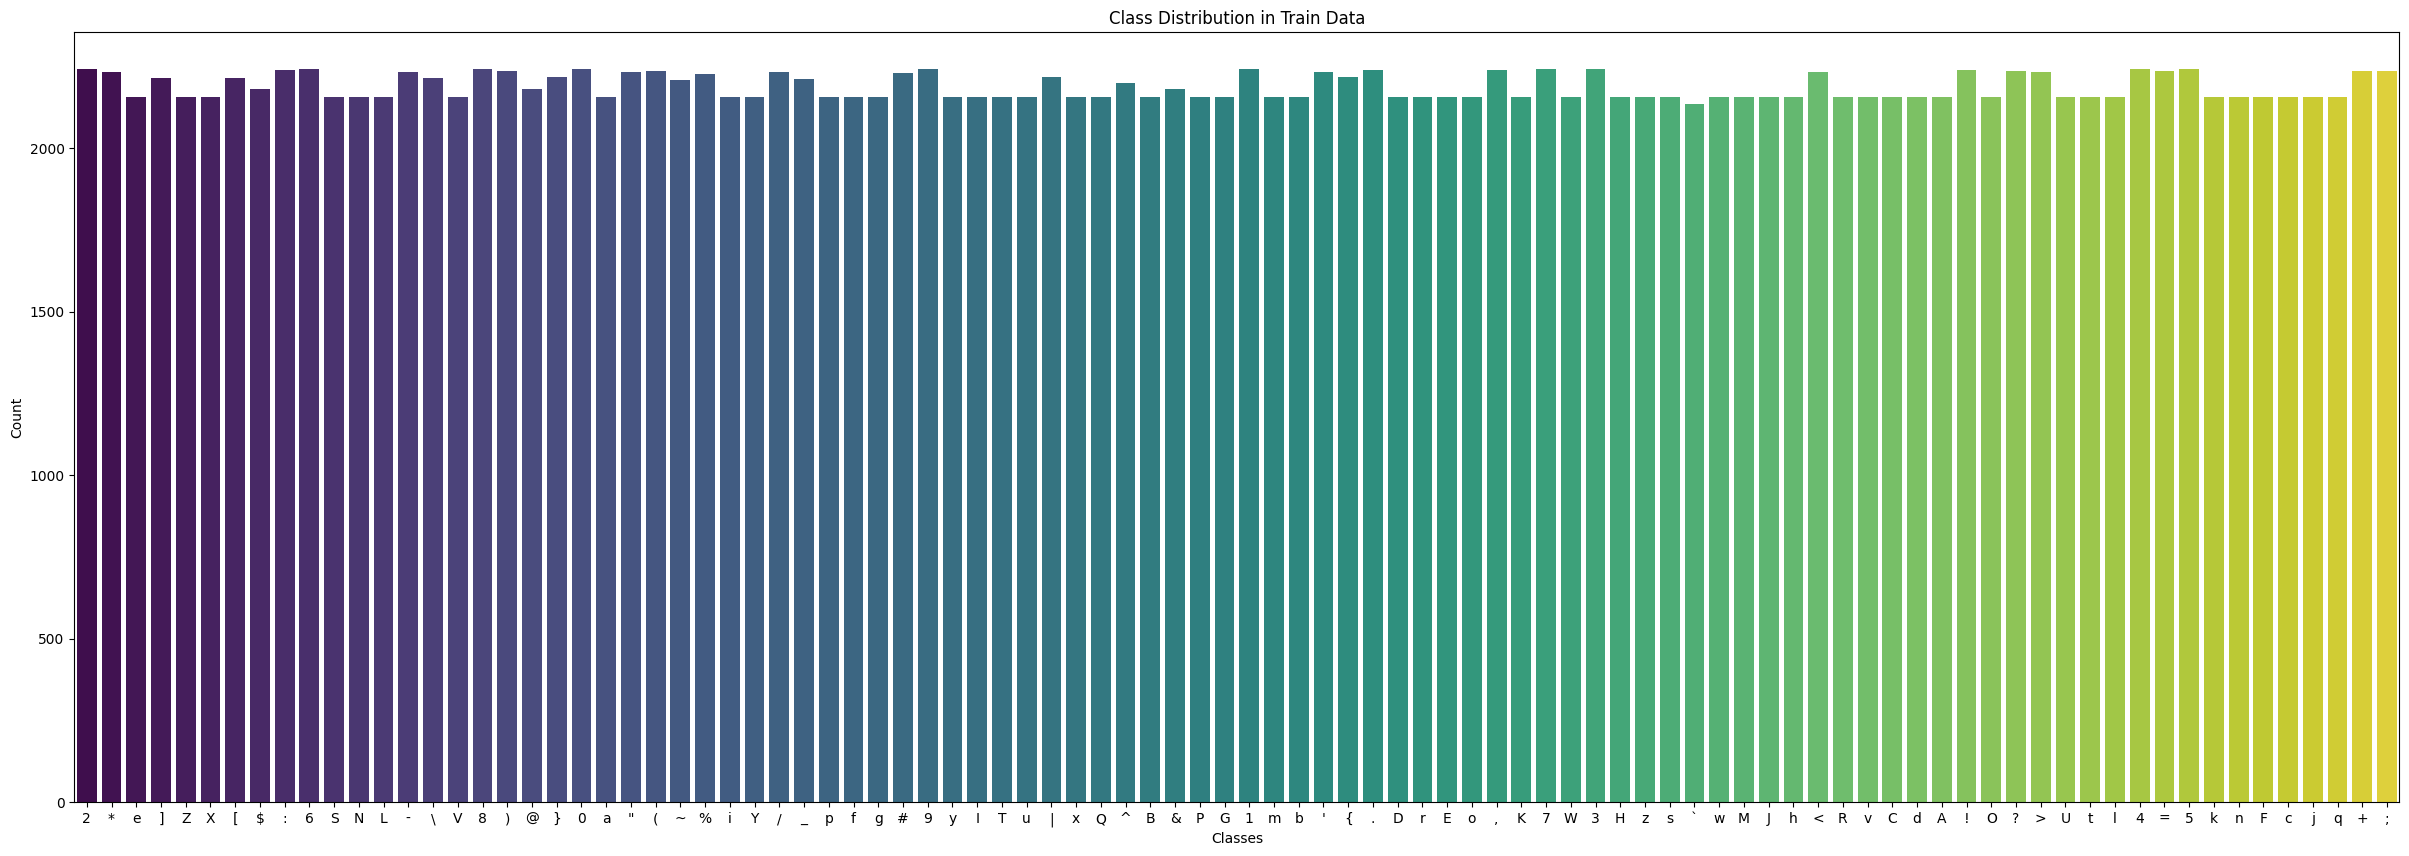

In [ ]:
# Assuming Y_train contains your class labels

plt.figure(figsize=(30, 10))

sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution in Train Data')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.show()

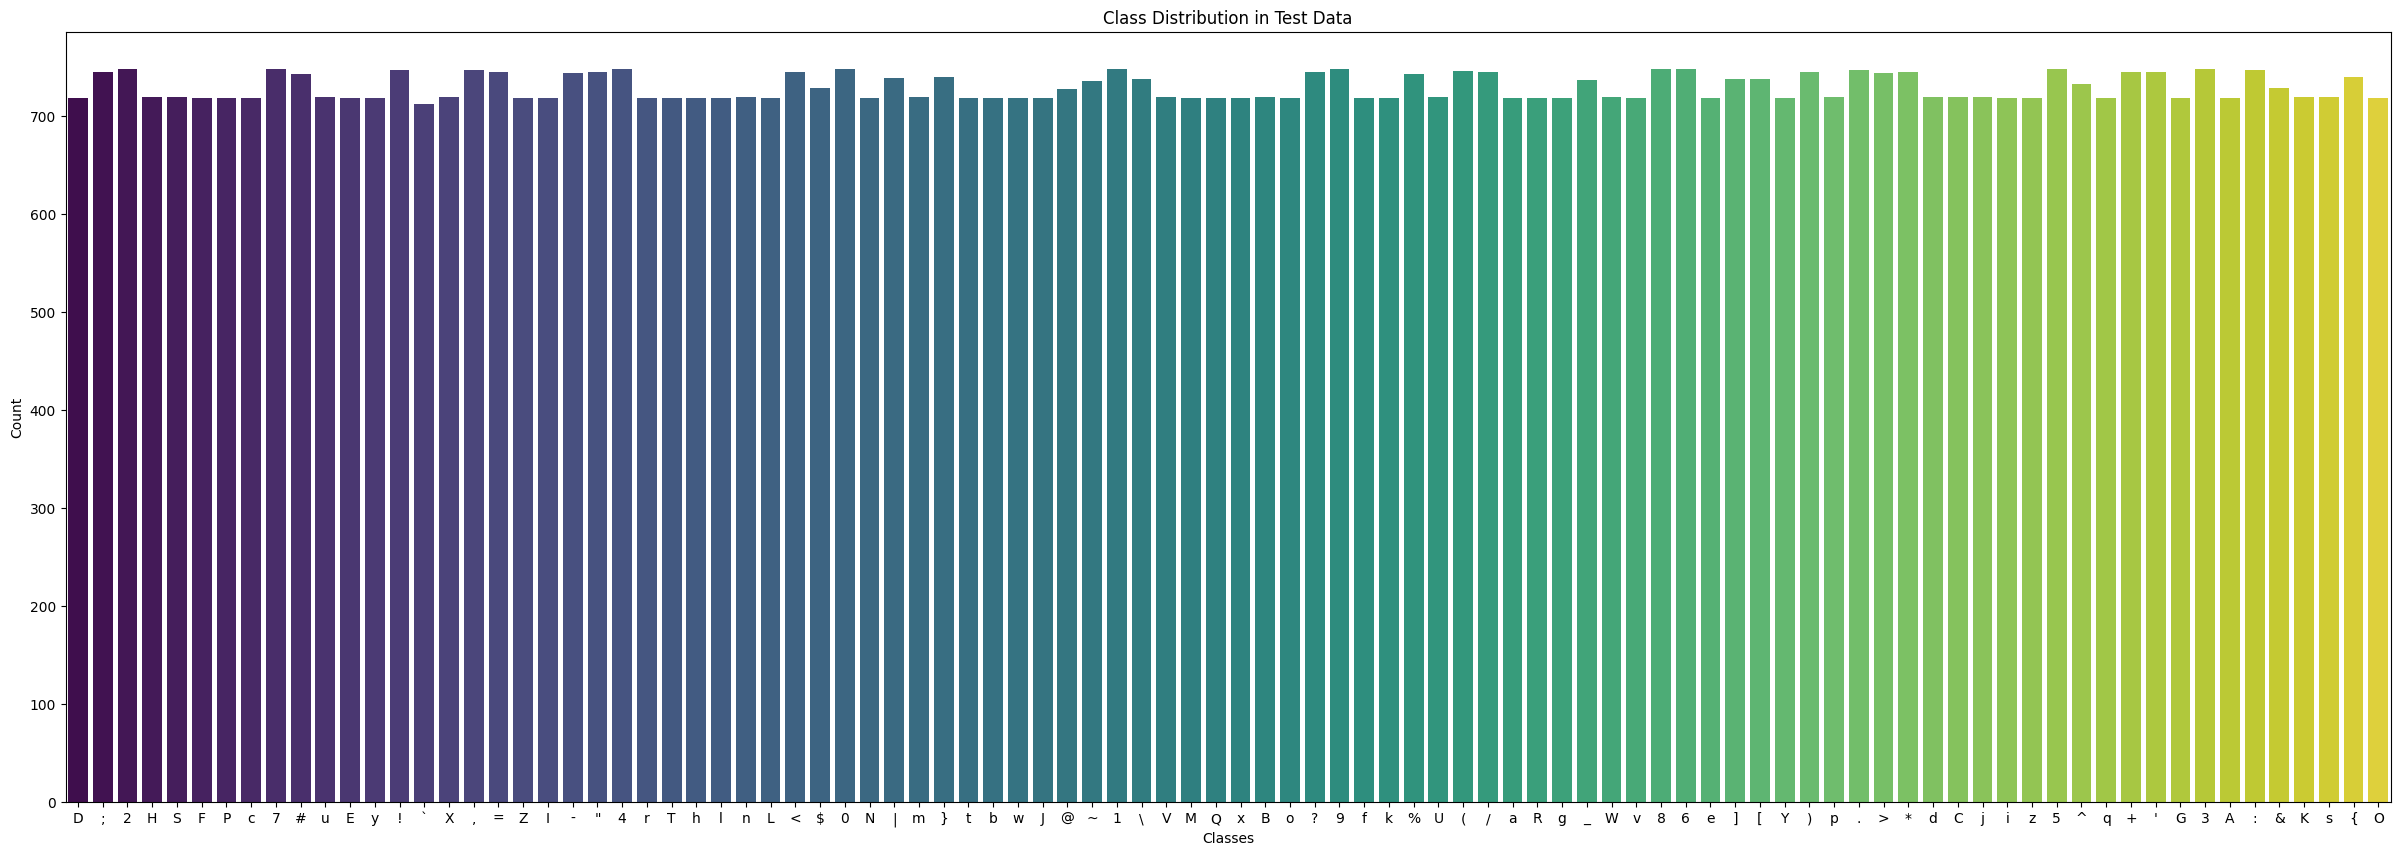

In [ ]:
# Assuming Y_train contains your class labels

plt.figure(figsize=(30, 10))

sns.countplot(x=Y_test, palette='viridis')
plt.title('Class Distribution in Test Data')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.show()

## 3. DATA PREPROCESSING

### ONE HOT ENCODING THE DATA

In [ ]:
#encoding the y values using one hot encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(Y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(Y_test.values.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### IDENTIFYING AND DROPPING TARGET

In [ ]:
y = df[['labels']]
x = df.drop(columns=['names','labels'], axis=1)

### TRAIN TEST SPLIT (80:20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

## 4. TRAIN THE MODEL


The LabelBinarizer class is used for label binarization, converting categorical labels into a binary format. This involves both fitting the label binarizer to the unique labels in y_train and transforming those labels into binary vectors. Subsequently, y_train_label holds binary representations of the original categorical labels. When applied to the test labels (y_test), the transform method ensures consistent mapping learned during training, transforming the test labels into binary vectors. These binary representations are commonly utilized to train and assess models that require numerical input for classification tasks.

In [ ]:
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)

### NORMALIZING THE DATA


Label binarization is performed before normalization because labels represent the target variable or the desired output of the model. Unlike input features, labels are not subjected to normalization. The reason is that normalization is a technique applied to input features to aid in the learning process of machine learning models. Normalizing labels doesn't have the same significance as normalizing features.

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.values.reshape(X_train.shape[0],28,28)
X_test = X_test.values.reshape(X_test.shape[0],28,28)

### IMPLEMENTATION OF CNN MODEL

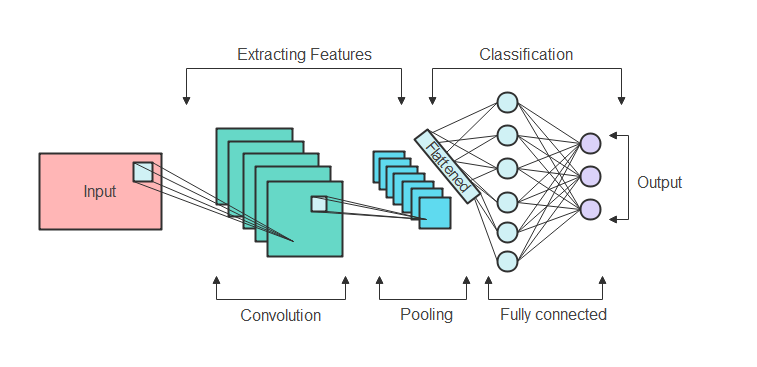

A Convolutional Neural Network (CNN) is specifically designed for the processing and analysis of visual data. Its fundamental components consist of convolutional layers, pooling layers, and fully connected layers.

1. ***Convolutional layers*** serve as the foundational elements of a CNN, comprising filters that learn to recognize a variety of features, such as edges, textures, or more intricate patterns in subsequent layers.

2. ***Pooling layers*** play a role in diminishing the spatial dimensions of the input volume. This reduction aids in retaining crucial features while mitigating computational complexity and guarding against overfitting.

3. Following a sequence of convolutional and pooling layers, the data undergoes a ***flattening process***, transforming it into a one-dimensional vector. This flattening operation is crucial for establishing connections between the convolutional and fully connected layers.

4. ***Fully connected layers***, conventional in neural networks, establish connections between every neuron in the previous and subsequent layers. They utilize the flattened output from earlier layers to make predictions based on the acquired features.

5. ***Activation functions*** are frequently employed to introduce nonlinearities into the model, enhancing its ability to capture complex relationships within the data.

6. The ***output layer*** is responsible for generating the final results of the model. In classification tasks, it commonly employs the softmax activation function to produce probabilities for each class.

In the given code, a Sequential model is initialized, representing a linear stack of layers in ***Keras***. This model simplifies the creation of a neural network, ensuring each layer has precisely one input tensor and one output tensor.

Following this, a convolutional layer is added to the model, utilizing the Rectified Linear Unit (ReLU) activation function. Subsequently, a max-pooling layer is incorporated, responsible for downsizing the spatial dimensions of the input volume by selecting the maximum value within each 2x2 region. This step aids in computational efficiency and emphasizes essential features.

Additional convolutional and max-pooling layers are introduced, followed by the flattening of the output from these layers into a one-dimensional array. This prepares the data for fully connected layers.

The model proceeds to include a fully connected layer comprising 128 neurons with a ReLU activation function.

The concluding layer is the output layer, featuring a number of neurons equivalent to the dataset's class count. The softmax activation function is employed for multi-class classification, generating probabilities for each class.

The ***summary() method*** is then utilized to print a comprehensive overview of the model's architecture, detailing the type and shape of each layer, along with the total number of parameters. This summary is valuable for gaining insights into the neural network's structure.

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64,(4,4),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(y_train_label.shape[1], activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

The ***Adaptive Moment Estimation (Adam)*** is a widely used optimization algorithm for training neural networks. It adjusts the learning rates of individual parameters by considering their historical gradients, rendering it effective for various optimization challenges.

***Categorical crossentropy*** serves as a prevalent choice for the loss function. Specifically designed for classification tasks with multiple classes, it quantifies the disparity between the actual class labels and the predicted probabilities.

For the evaluation of model performance in classification tasks, the ***accuracy metric*** is commonly utilized. This metric gauges the proportion of correctly classified samples, providing a measure of the model's overall correctness in predicting class labels.

In [ ]:
optimizer = Adam()
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### FITTING THE CNN MODEL

Following hyperparameters are set for the CNN

1. ***epochs=10:*** An epoch is one complete pass through the entire training dataset. The model will be trained for 20 epochs, meaning it will go through the entire dataset 20 times.

2. ***batch_size=128:*** The training dataset is divided into batches, and the model's weights are updated after processing each batch. In this case, each batch consists of 128 samples.

In [ ]:
history = cnn_model.fit(X_train, y_train_label, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
1542/1542 [==============================] - 73s 47ms/step - loss: 0.6830 - accuracy: 0.8125 - val_loss: 0.4023 - val_accuracy: 0.8745
Epoch 2/10
1542/1542 [==============================] - 72s 47ms/step - loss: 0.3374 - accuracy: 0.8957 - val_loss: 0.3138 - val_accuracy: 0.9027
Epoch 3/10
1542/1542 [==============================] - 71s 46ms/step - loss: 0.2703 - accuracy: 0.9163 - val_loss: 0.2583 - val_accuracy: 0.9213
Epoch 4/10
1542/1542 [==============================] - 71s 46ms/step - loss: 0.2352 - accuracy: 0.9244 - val_loss: 0.2550 - val_accuracy: 0.9224
Epoch 5/10
1542/1542 [==============================] - 71s 46ms/step - loss: 0.2088 - accuracy: 0.9322 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 6/10
1542/1542 [==============================] - 71s 46ms/step - loss: 0.1890 - accuracy: 0.9374 - val_loss: 0.2355 - val_accuracy: 0.9253
Epoch 7/10
1542/1542 [==============================] - 71s 46ms/step - loss: 0.1732 - accuracy: 0.9411 - val_loss: 0.2239 -

## 5. EVALUATING THE MODEL

In [ ]:
accuracy_test = cnn_model.evaluate(X_test, y_test_label, verbose = 0)
print('Accuracy of CNN model:', round(accuracy_test[1]*100,2), '%')

Accuracy of CNN model: 93.22 %


### **Observations:**


* ***The final accuracy result of approximately 93.22%***
* It suggests that the model has accurately predicted the class labels for 93.22% (approx.) of the test samples, demonstrating its effectiveness in generalizing to previously unseen data.

### 6. VIZUALIZING THE ACCURACY

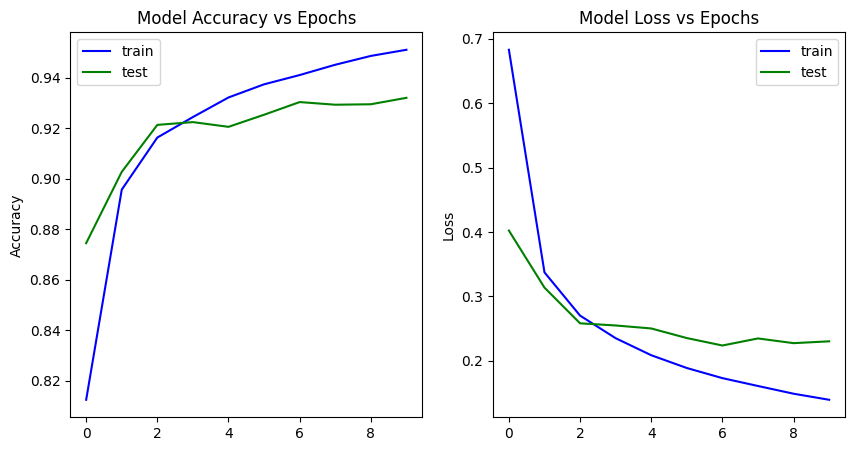

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
epochs=np.arange(10)
plt.title('Model Accuracy vs Epochs')
plt.plot(epochs, history.history['accuracy'], label='train', color='blue')
plt.ylabel('Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='test', color='green')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model Loss vs Epochs')
plt.plot(epochs, history.history['loss'], label='train', color='blue')
plt.ylabel('Loss')
plt.plot(epochs, history.history['val_loss'], label='test', color='green')
plt.legend()
plt.show()

## IMPLEMENTATION OF CNN WITH MODIFICATIONS

The below CNN has
1. additional **Dropout** layers **(rate = 0.3)** for regularization
2. uses different **kernel sizes ((5x5 and 3x3)** in Convolutional layers.
3. uses different optimizer - **Adamax**

### PREPROCESSING DATA

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train1.values.reshape(-1,1))
y_test_encoded= enc.transform(y_test1.values.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_modif=X_train1.values.reshape(X_train1.shape[0],28,28)
X_test_modif=X_test1.values.reshape(X_test1.shape[0],28,28)

image_rows=X_train_modif[0].shape[0]
image_cols=X_test_modif[0].shape[1]

X_train_modif=X_train_modif.reshape(X_train_modif.shape[0],image_rows,image_cols,1)

X_test_modif=X_test_modif.reshape(X_test_modif.shape[0],image_rows,image_cols,1)

Input_shape=(image_rows,image_cols,1)

### IMPLEMENTATION OF CNN MODEL WITH MODIFICATION

**Dropout:**
* Dropout is a regularization technique used in neural networks to prevent overfitting.
* During training, dropout randomly sets a fraction of input units to zero at each update, effectively "dropping them out" of the network for that iteration.
* This means those neurons won't contribute to the forward pass or backpropagation during that training step.

In [ ]:
model_new = keras.Sequential(
    [
        keras.Input(shape=Input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(94, activation="softmax"),
    ]
)

**Adamax:**

* Adamax is an optimization algorithm used in training neural networks. It is an extension of the Adam optimizer (Adaptive Moment Estimation).
* Both Adam and Adamax are adaptive learning rate optimization algorithms that are well-suited for training deep neural networks.
* Adamax is considered to be more robust with regards to hyperparameters while dealing with large models and noisy data.

In [ ]:
model_new.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics = ['accuracy'] )


In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",
mode ="min", patience = 5,
restore_best_weights = True)



history_1 = model_new.fit(X_train_modif, y_train_encoded, batch_size = 128,
epochs = 10, validation_data =(X_test_modif, y_test_encoded),
callbacks =[earlystopping])

Epoch 1/10
1607/1607 [==============================] - 81s 50ms/step - loss: 1.5954 - accuracy: 0.6137 - val_loss: 0.4527 - val_accuracy: 0.8758
Epoch 2/10
1607/1607 [==============================] - 79s 49ms/step - loss: 0.5568 - accuracy: 0.8437 - val_loss: 0.3366 - val_accuracy: 0.9049
Epoch 3/10
1607/1607 [==============================] - 80s 50ms/step - loss: 0.4229 - accuracy: 0.8784 - val_loss: 0.2888 - val_accuracy: 0.9143
Epoch 4/10
1607/1607 [==============================] - 79s 49ms/step - loss: 0.3588 - accuracy: 0.8947 - val_loss: 0.2636 - val_accuracy: 0.9204
Epoch 5/10
1607/1607 [==============================] - 79s 49ms/step - loss: 0.3255 - accuracy: 0.9032 - val_loss: 0.2508 - val_accuracy: 0.9244
Epoch 6/10
1607/1607 [==============================] - 79s 49ms/step - loss: 0.3020 - accuracy: 0.9086 - val_loss: 0.2342 - val_accuracy: 0.9280
Epoch 7/10
1607/1607 [==============================] - 79s 49ms/step - loss: 0.2810 - accuracy: 0.9145 - val_loss: 0.2262 -

**Dropout rate: 0.3**
* 30% of neurons will be kicked off and will introduce regularization making the model to avoid overfitting.

**Early Stopping:**
* A Keras callback that stops training when a monitored quantity has stopped improving.
* We have implemented early stopping wiht patience value as 5.



### EVALUATING ACCURACY

In [ ]:
val_loss, val_acc = model_new.evaluate(X_test_modif, y_test_encoded)  # evaluate the out of sample data with model
print('Validation Loss is :',val_loss)  # model's loss (error)
print('Validation Accuracy is: ',val_acc)  # model's accuracy

2142/2142 [==============================] - 10s 5ms/step - loss: 0.2117 - accuracy: 0.9334
Validation Loss is : 0.21166583895683289
Validation Accuracy is:  0.9333810210227966


In [ ]:
#print('Accuracy of CNN-modified model:', round(val_acc[1]*100,2), '%')
Val_Accuracy = val_acc * 100
print(Val_Accuracy, '%')

93.33810210227966 %


**How modification affects the accuracy:**

Modification include - change in dropout rate, changing Kernel size, using adamax as optimize.

we can observe the following:

* accuaracy rate - ***before modifications: 93.22%***
* accuaracy rate - ***after modifications: 93.33%***


**In this case, the accuracy rate is not much affected even after modifications.**

## **IMPLEMENTATION OF DNN MODEL**

**Deep Neural Networks (DNNs)** include multiple hidden layers situated between the input and output layers. This layering facilitates the learning of hierarchical representations of input data, allowing the network to capture intricate patterns and features automatically. The training of DNNs employs the backpropagation algorithm, where the adjustment of connection weights between neurons aims to minimize the disparity between predicted and actual outputs. This iterative process involves computing gradients and updating weights through optimization techniques. DNNs excel in automatically acquiring hierarchical representations and learning complex patterns in data.

We follow the same procedure as above to implement DNN architecture

### TRAIN THE MODEL

In [ ]:
X = df.drop(columns=['names','labels']).values

# Assigning Classes
y = df[['labels']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [ ]:
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
#print('Train labels dimension:');print(y_train.shape)
#print('Test labels dimension:');print(y_test.shape)

In [ ]:
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

### IMPLEMENTATION OF DNN MODEL

The architecture includes densely connected layers with ReLU activation and dropout for regularization. The model is compiled with the categorical crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric.

In [ ]:
dnnmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax'),
])

#dnnmodel.compile(losdnnmodel.summary()s='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dnnmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
dnnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 126)              

### FITTING THE DNN MODEL

In [ ]:
dnn_result = dnnmodel.fit(X_train, y_train_label, epochs=100, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/100
771/771 [==============================] - 23s 29ms/step - loss: 0.8788 - accuracy: 0.7562 - val_loss: 0.4412 - val_accuracy: 0.8575
Epoch 2/100
771/771 [==============================] - 22s 28ms/step - loss: 0.4598 - accuracy: 0.8527 - val_loss: 0.3668 - val_accuracy: 0.8773
Epoch 3/100
771/771 [==============================] - 22s 29ms/step - loss: 0.3940 - accuracy: 0.8692 - val_loss: 0.3406 - val_accuracy: 0.8855
Epoch 4/100
771/771 [==============================] - 22s 29ms/step - loss: 0.3570 - accuracy: 0.8800 - val_loss: 0.3181 - val_accuracy: 0.8938
Epoch 5/100
771/771 [==============================] - 22s 29ms/step - loss: 0.3300 - accuracy: 0.8874 - val_loss: 0.3057 - val_accuracy: 0.8969
Epoch 6/100
771/771 [==============================] - 22s 29ms/step - loss: 0.3076 - accuracy: 0.8940 - val_loss: 0.3024 - val_accuracy: 0.9025
Epoch 7/100
771/771 [==============================] - 22s 29ms/step - loss: 0.2894 - accuracy: 0.8993 - val_loss: 0.2916 - val_ac

### EVALUATING MODEL ACCURACY

In [ ]:
# Extract accuracy values for each epoch
acc_history = dnn_result.history['accuracy']
val_acc_history = dnn_result.history['val_accuracy']

# Find epoch with highest accuracy on validation set
best_val_acc_epoch = val_acc_history.index(max(val_acc_history))

# Get accuracy on test data for best epoch
best_test_acc = dnnmodel.evaluate(X_test, y_test_label, verbose=0)[1]
print(f"Highest accuracy on validation set achieved in epoch {best_val_acc_epoch+1}")
print(f"Accuracy of DNN on test dataset for best epoch is: {round(best_test_acc, 4)*100}%")

Highest accuracy on validation set achieved in epoch 75
Accuracy of DNN on test dataset for best epoch is: 92.65%


## CONCLUSION

Based on the outcomes,



Based on the outcomes, the Deep Neural Network (DNN) achieved an accuracy of on the test dataset at its best epoch, while the Convolutional Neural Network (CNN) attained an accuracy of **92.65%** . Additionally, the CNN model reached its highest accuracy of **93.33%** at epoch 10, surpassing the accuracy achieved by the DNN model.

***These findings indicate that, for this specific dataset, the CNN model exhibits superior performance compared to the DNN model.***
CNNs are generally more effective for image classification tasks because they can effectively learn spatial features inherent in image data, a capability not present in DNNs.
This spatial feature learning enables CNNs to more accurately capture patterns and relationships within image data, leading to enhanced classification accuracy.

***In conclusion, based on the demonstrated performance, it is advisable to opt for the CNN model for this dataset due to its superior performance in comparison to the DNN model.***

##References:

https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters/code?datasetId=1564532

## LICENSE



Copyright 2023 Smithi Parthiban

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.